## Bellabeat Marketing Analysis
### by Ayilaran Ifedayo

### Introduction
Bellabeat is a high-tech manufacturer of health-focused products for women. They are a successful small company but they, but they have the potential to become a larger player in the global smart device market. In a bid to increase their marketing startegies, and recognize important trends in consumers' usage, data was gathered from 30 customers. As a consulting data analyst, my job is to load, clean and transform the data so I can perform analysis and extract useful insights using visualizations. 
These insights will be used to improve Bellabeat's marketing strategies. 


#### Preliminary Wrangling


In [306]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_theme(style='ticks', palette='pastel')

%matplotlib inline

Load the necessary datasets. 

In [307]:
activity=pd.read_csv('dailyActivity_merged.csv')
sleep=pd.read_csv('sleepDay_merged.csv')


#### Let's check the activity data

In [308]:
activity.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [309]:
print(activity.dtypes)
print(activity.shape)

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
(940, 15)


In [310]:
sum(activity.duplicated())

0

Check for null values.

In [311]:
print(activity.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


Check for duplicates.

In [312]:
print(activity.duplicated().sum())

0


### Data Cleaning

#### The issues were found with the activity data:
1.  The ActivityDate column is formatted wrongly; object instead of datetime. 
2.  No information on day of the week(this will be needed for further analyses).
3.  There are some irrelevant columns.
4.  Column headers do not follow naming conventions. 
5.  There should be a calculated column for total minutes.

##### Convert `ActivityDate` from object to datetime

In [313]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format="%m/%d/%Y")
activity.info()
activity['ActivityDate'].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
Name: ActivityDate, dtype: datetime64[ns]

##### Create new `Day of the Week` column

In [314]:
activity['DayOfTheWeek']=activity['ActivityDate'].dt.day_name()

activity['DayOfTheWeek'].head(3)

0      Tuesday
1    Wednesday
2     Thursday
Name: DayOfTheWeek, dtype: object

##### Create `TotalMins` as a sum of `VeryActiveMinutes`, `FairlyActiveMinutes`, `LightlyActiveMinutes` and `SedentaryMinutes`              

In [315]:
activity['TotalMins']= activity['VeryActiveMinutes'] +activity['FairlyActiveMinutes']+activity['LightlyActiveMinutes']+activity['SedentaryMinutes']

activity['TotalMins'].head(3)

0    1094
1    1033
2    1440
Name: TotalMins, dtype: int64

##### Convert `TotalMins` to hours in a new column `TotalHours`

In [316]:
activity['TotalHours']= round(activity['TotalMins']/60)

activity['TotalHours'].head(3)

0    18.0
1    17.0
2    24.0
Name: TotalHours, dtype: float64

##### Rename the columns as lowercases according to naming convention

In [317]:
activity.rename(columns=
{'Id': 'id', 'ActivityDate':'date', 'TotalSteps': 'total_steps', 'TotalDistance': 'total_distance', 'TrackerDistance': 'tracker_distance',
 'LoggedActivitiesDistance':  'logged_activities_distance', 'VeryActiveDistance': 'very_active_distance',
       'ModeratelyActiveDistance':'moderately_active_distance', 'LightActiveDistance':'light_active_distance',
       'SedentaryActiveDistance': 'sedentary_active_distance', 'VeryActiveMinutes': 'very_active_minutes', 'FairlyActiveMinutes': 'fairly_active_minutes',
       'LightlyActiveMinutes':'lightly_active_minutes', 'SedentaryMinutes':'sedentary_minutes', 'Calories':'calories', 'DayOfTheWeek':'day_of_the_week',
       'TotalMins':'total_mins', 'TotalHours':'total_hours'
}, inplace=True)



In [318]:
print(activity.columns)

Index(['id', 'date', 'total_steps', 'total_distance', 'tracker_distance',
       'logged_activities_distance', 'very_active_distance',
       'moderately_active_distance', 'light_active_distance',
       'sedentary_active_distance', 'very_active_minutes',
       'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes',
       'calories', 'day_of_the_week', 'total_mins', 'total_hours'],
      dtype='object')


##### Write a function to drop `tracker_distance` and `logged_activities_distance` as they are not needed.

In [319]:
def drop(col):
    activity.drop(col, axis=1, inplace=True)

In [320]:
drop('tracker_distance')
drop('logged_activities_distance')

print(activity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          940 non-null    int64         
 1   date                        940 non-null    datetime64[ns]
 2   total_steps                 940 non-null    int64         
 3   total_distance              940 non-null    float64       
 4   very_active_distance        940 non-null    float64       
 5   moderately_active_distance  940 non-null    float64       
 6   light_active_distance       940 non-null    float64       
 7   sedentary_active_distance   940 non-null    float64       
 8   very_active_minutes         940 non-null    int64         
 9   fairly_active_minutes       940 non-null    int64         
 10  lightly_active_minutes      940 non-null    int64         
 11  sedentary_minutes           940 non-null    int64         

##### The columns are not arranged as I want them. I'll rearrange the columns. 

In [321]:
column_titles=['id', 'date', 'day_of_the_week', 'total_steps', 'total_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'total_mins', 'total_hours', 
       'calories']
       
       
activity.reindex(columns= column_titles)



,id,date,day_of_the_week,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.500000,1.88,0.55,6.06,0.00,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.970000,1.57,0.69,4.71,0.00,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.740000,2.44,0.40,3.91,0.00,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.280000,2.14,1.26,2.83,0.00,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.160000,2.71,0.41,5.04,0.00,36,10,221,773,1040,17.0,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,10686,8.110000,1.08,0.20,6.80,0.00,17,4,245,1174,1440,24.0,2847
936,8877689391,2016-05-09,Monday,20226,18.250000,11.10,0.80,6.24,0.05,73,19,217,1131,1440,24.0,3710
937,8877689391,2016-05-10,Tuesday,10733,8.150000,1.35,0.46,6.28,0.00,18,11,224,1187,1440,24.0,2832
938,8877689391,2016-05-11,Wednesday,21420,19.559999,13.22,0.41,5.89,0.00,88,12,213,1127,1440,24.0,3832


#### Lets check the sleep data

In [322]:
sleep.sample(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
242,5553957443,4/26/2016 12:00:00 AM,1,412,453
342,7086361926,4/15/2016 12:00:00 AM,1,377,386
181,4445114986,4/29/2016 12:00:00 AM,1,106,108
97,3977333714,4/28/2016 12:00:00 AM,1,261,423
152,4388161847,4/24/2016 12:00:00 AM,3,552,595


In [323]:
print(sleep.duplicated().sum())

3


In [324]:
print(sleep.isna().sum())

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


In [325]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


### Data Cleaning

##### The issues were found with the sleep data:
1. The `SleepDay` column is wrongly formatted; object instead of datetime. 
2. There are some duplicate records in the data.
3. There should be a day column for further analyses. 
4. Column headers do not follow naming conventions. 

##### Convert `SleepDay` from object to datetime

In [326]:
#trim spaces after the first nine strings to avoid the error that kept popping up when changing data type
sleep['SleepDay'] = sleep['SleepDay'].str.slice(0,9).str.replace(' ','')
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format="%m/%d/%Y")
sleep.info()
sleep['SleepDay'].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


0   2016-04-12
1   2016-04-13
2   2016-04-15
Name: SleepDay, dtype: datetime64[ns]

##### Create new `sleep_day` column

In [327]:
sleep['sleep_day']=sleep['SleepDay'].dt.day_name()

sleep['sleep_day'].head(3)

0      Tuesday
1    Wednesday
2       Friday
Name: sleep_day, dtype: object

##### Drop duplicates.

In [328]:
sleep = sleep.drop_duplicates(keep='first')

##### Create a new column that converts TotalMinutesAsleep to hours.

In [329]:
sleep['total_sleep_hours']= round(sleep['TotalMinutesAsleep']/60)

sleep.total_sleep_hours.head(3)

0    5.0
1    6.0
2    7.0
Name: total_sleep_hours, dtype: float64

##### Rename the columns as lowercases according to naming convention.

In [330]:
sleep.rename(columns=
{'Id': 'id', 'SleepDay':'sleep_date', 'TotalSleepRecords': 'total_sleep_records', 
'TotalMinutesAsleep': 'total_minutes_asleep', 'TotalTimeInBed': 'total_time_in_bed',
}, inplace=True)

print(sleep.columns)

Index(['id', 'sleep_date', 'total_sleep_records', 'total_minutes_asleep',
       'total_time_in_bed', 'sleep_day', 'total_sleep_hours'],
      dtype='object')


### That's it! We are done with the data wrangling phase and we can move on to exploration. If we face cleanliness issues later, we will address them. 

So far, the datasets have been loaded and cleaned. The activity data has 15 columns with 940 rows and the sleep data has 7 columns and 410 rows. Moving forward, I would like to test these features to answer questions like:
- How does activity affect calories?
- How does sleep affect calories?
- Are users active or sedentary?
- Is actvity more intense on some days?

Some features in the datasets which will be helpful in answering these questions include:

- Total Distance
- Day of the Week
- Total Minutes 
- Total Sleep Hours
- Calories

I hope to extract more questions and insights in order to provide a solution for the business. 


#### Daily activity and sleep average statistics

In [331]:
activity.describe()

,id,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_mins,total_hours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


In [332]:
#daily activity statistics
print(activity[['total_distance', 'total_steps', 'calories','very_active_minutes','sedentary_minutes']].mean())

total_distance            5.489702
total_steps            7637.910638
calories               2303.609574
very_active_minutes      21.164894
sedentary_minutes       991.210638
dtype: float64


1. We can see that users logged an average of 7637 steps/5.48km which is not adequate. The CDC recommends atleast 10000 steps daily to be considered active or fit. 
2. Sedentary minutes account for majority of minutes. They account for 991 minutes which is over 16 hours. 
3. Average calories burned is 2303.

In [333]:
sleep.describe()

,id,total_sleep_records,total_minutes_asleep,total_time_in_bed,total_sleep_hours
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927,6.990244
std,2.060863e+09,0.346636,118.635918,127.455140,1.990172
min,1.503960e+09,1.000000,58.000000,61.000000,1.000000
25%,3.977334e+09,1.000000,361.000000,403.750000,6.000000
50%,4.702922e+09,1.000000,432.500000,463.000000,7.000000
75%,6.962181e+09,1.000000,490.000000,526.000000,8.000000
max,8.792010e+09,3.000000,796.000000,961.000000,13.000000


In [334]:
print(sleep[['total_minutes_asleep', 'total_time_in_bed']].mean())

print('The ratio of average time asleep to average time in bed is: '+str(sleep['total_minutes_asleep'].mean()/sleep['total_time_in_bed'].mean()))

total_minutes_asleep    419.173171
total_time_in_bed       458.482927
dtype: float64
The ratio of average time asleep to average time in bed is: 0.9142612433369862


Users spend 91% of their time in bed sleeping. 

#### Since I had some issues ordering my categorical variable, I would like to write a function to order it. 

In [335]:
def cat_var_mapping():
    mapping=pd.DataFrame({
    'Day':['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
    })
    sort_mapping= mapping.reset_index().set_index('Day')
    activity['day_num'] = activity['day_of_the_week'].map(sort_mapping['index'])
    activity.sort_values(['day_num'], inplace=True)
    activity.drop('day_num', inplace=True, axis=1)

Now, I can call cat_var_mapping on my maps to order the day of the week. 

#### I'll start by examing the features of interest. 

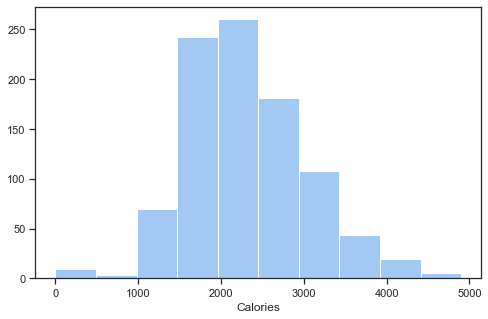

In [336]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, activity['calories'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data =activity, x = 'calories')
plt.xlabel('Calories')
plt.show()

The histogram appears to have one clear center that much of the data clusters around. As you get away from this center(2500), there are fewer and fewer values. There also seems to be a few outliers but it could be due to certain factors like fasting, or binge-eating.

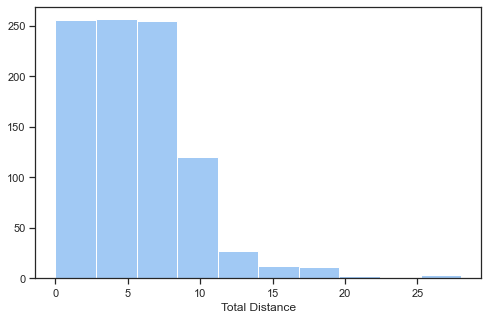

In [337]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, activity['total_distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data =activity, x = 'total_distance')
plt.xlabel('Total Distance')
plt.show()

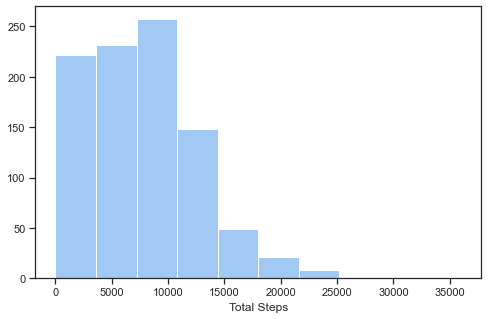

In [338]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, activity['total_steps'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data =activity, x = 'total_steps')
plt.xlabel('Total Steps')
plt.show()

Total steps and total distance appear to be postivtly skewed to the right. This means that the data is generally clustered around shorter distances and smaller steps and as you move towards londer distances and more steps, there are fewer and fewer data.

 

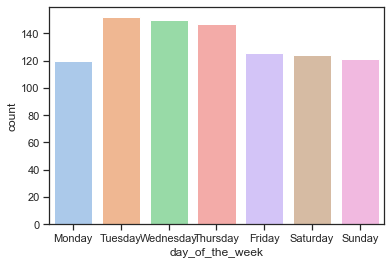

In [339]:
cat_var_mapping()
sns.countplot(data = activity, x = 'day_of_the_week')
plt.figsize = (8,8)
plt.show()

There are more device during the week than on the weekends. Plotting this against other variables might provide interesting insights. 

#### Question: How many hours do users spend in bed?

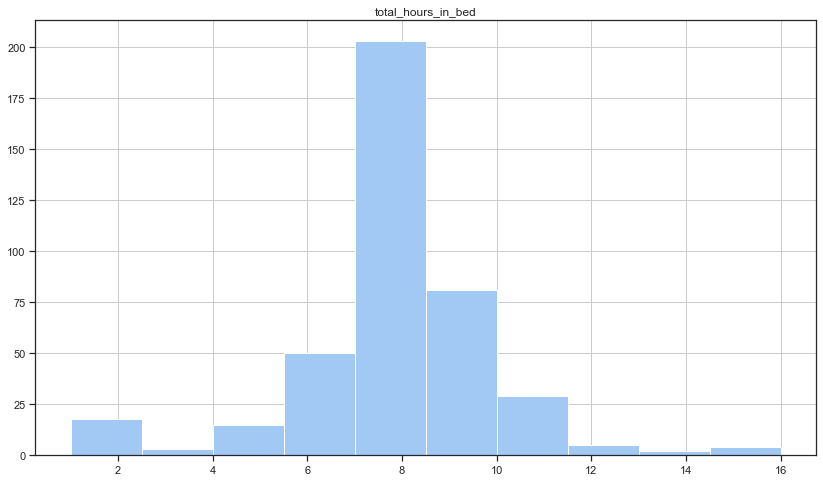

In [340]:
sleep['total_hours_in_bed']=round(sleep[['total_time_in_bed']]/60)
sleep[['total_hours_in_bed']].hist(figsize=(14,8));



Observation- Majority of users stay in bed between 8-9 hours. 

#### Question: How many hours do users sleep?

array([[<AxesSubplot:title={'center':'total_sleep_hours'}>]], dtype=object)

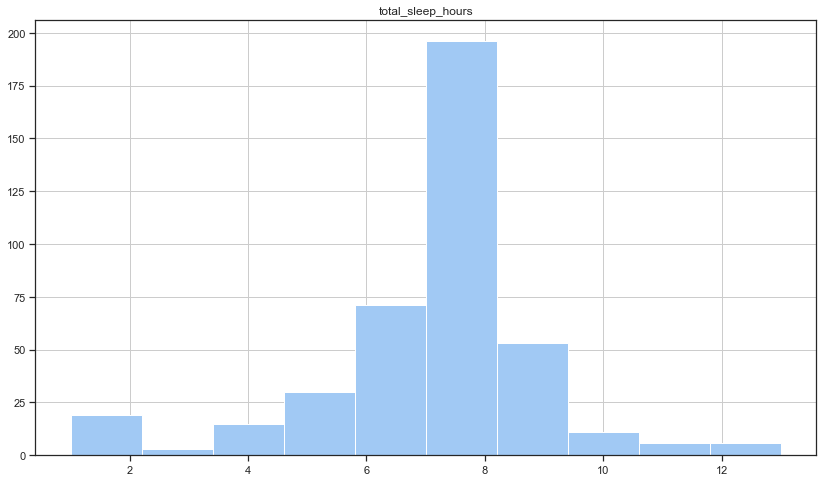

In [341]:
sleep[['total_sleep_hours']].hist(figsize=(14,8))



Observation- Majority of users sleep for 7 hours.

#### Question: Do users log in often?

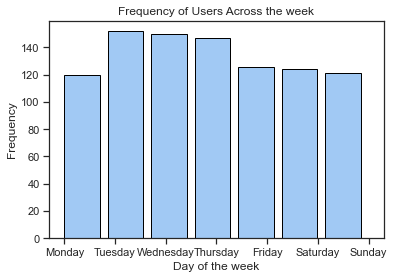

In [342]:
cat_var_mapping()
plt.figure(figsize=(6,4))
plt.hist(activity['day_of_the_week'], bins=7, width=0.7, edgecolor='black')
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.title('Frequency of Users Across the week')
plt.show()

Observation- Users track their activity during the week more than weekends. This could be because they are more active on weekdays and could forget on the weekends. 

#### Question: Which day of the week records the most activity?

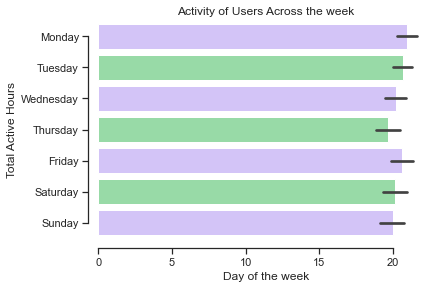

In [343]:
cat_var_mapping()
f, ax = plt.subplotsfigsize=(12,9)
sns.barplot(data=activity, x='total_hours', y='day_of_the_week', label='Total', palette=['m','g'])
plt.xlabel('Day of the week')
plt.ylabel('Total Active Hours')
plt.title('Activity of Users Across the week')
sns.despine(offset=10, trim=True)

Observation- Users are mostly active at the beginning of week and Fridays. 

#### Question: What day of the week do users burn more calories?

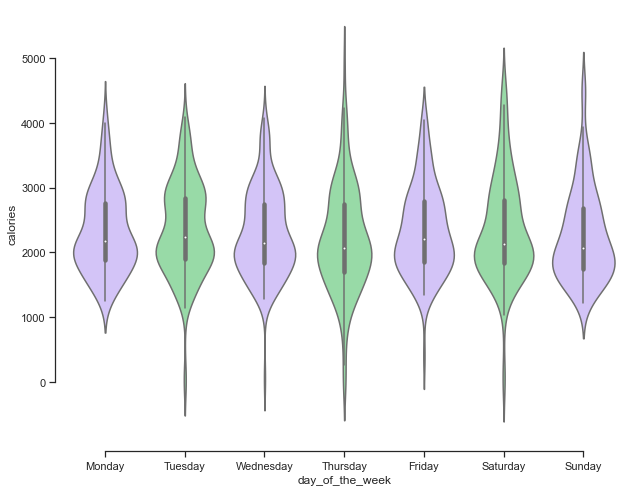

In [344]:
cat_var_mapping()
f, ax = plt.subplots(figsize=(10,8))
sns.violinplot(data=activity, x='day_of_the_week', y='calories', palette=['m','g'])

sns.despine(offset=10, trim=True)

Observation- No significant difference. 

#### Question: How does Total _Active_Minutes affect Calories?

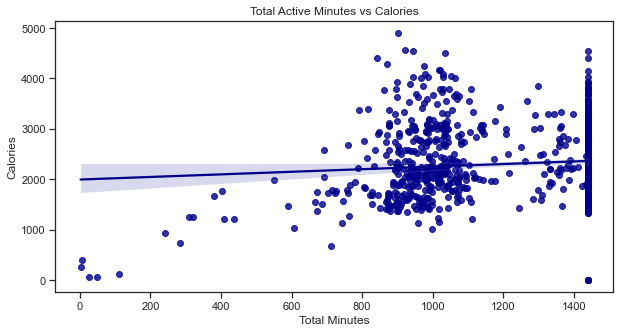

In [345]:

f, ax = plt.subplots(figsize=(10,5))
ax= sns.regplot(x='total_mins', y='calories', data=activity, color='darkblue')

ax.set(xlabel='Total Minutes', ylabel='Calories', title='Total Active Minutes vs Calories');


Observation- The plot shows that there is a high positive correlation between total active minutes and calories burned. It could mean that low active minutes will lead to less calories burned, and vice versa. 

#### Question: Do users burn calories while they sleep?

In [346]:
activity_sleep=pd.concat([activity, sleep], axis=1)
activity_sleep.head(3)

,id,date,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,...,total_mins,total_hours,id,sleep_date,total_sleep_records,total_minutes_asleep,total_time_in_bed,sleep_day,total_sleep_hours,total_hours_in_bed
845,8378563200,2016-05-09,8382,6.65,1.27,0.66,4.72,0.0,71,13,...,1027,17.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
674,6775888955,2016-05-02,0,0.00,0.00,0.00,0.00,0.0,0,0,...,1440,24.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
449,4445114986,2016-04-18,6155,4.24,2.00,0.29,1.95,0.0,25,6,...,1440,24.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


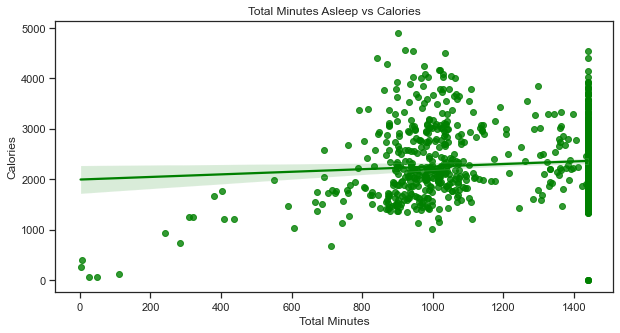

In [347]:
f, ax = plt.subplots(figsize=(10,5))
ax= sns.regplot(x='total_mins', y='calories', data=activity_sleep, color='green')

ax.set(xlabel='Total Minutes', ylabel='Calories', title='Total Minutes Asleep vs Calories');




Observation- This plot shows that there is little to no correlation to the total minutes asleep and calories burned.This means that an increase or decrease in on variable will not likely have an effect on the other. 

#### Question: Does activity influence sleep or vice-versa?

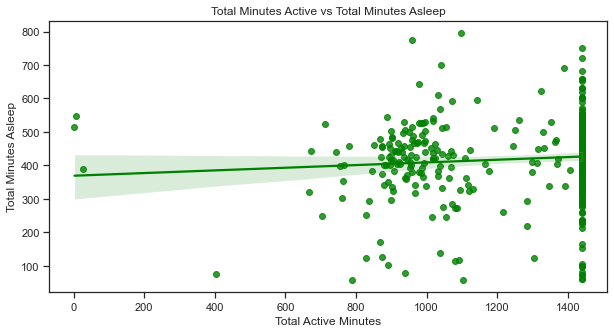

In [348]:
f, ax = plt.subplots(figsize=(10,5))
ax= sns.regplot(x='total_mins', y='total_minutes_asleep', data=activity_sleep, color='green')

ax.set(xlabel='Total Active Minutes', ylabel='Total Minutes Asleep', title='Total Minutes Active vs Total Minutes Asleep');




Observation- This plot shows that there is little to no correlation betwen the two variables. 

#### Question: Are any other features affected by others?

                                  id  total_steps  total_distance  \
id                          1.000000     0.185721        0.241000   
total_steps                 0.185721     1.000000        0.985369   
total_distance              0.241000     0.985369        1.000000   
very_active_distance        0.308691     0.740115        0.794582   
moderately_active_distance  0.026665     0.507105        0.470758   
light_active_distance       0.019629     0.692208        0.662002   
sedentary_active_distance  -0.015698     0.070505        0.082389   
very_active_minutes         0.303608     0.667079        0.681297   
fairly_active_minutes       0.051158     0.498693        0.462899   
lightly_active_minutes     -0.098754     0.569600        0.516300   
sedentary_minutes          -0.043319    -0.327484       -0.288094   
calories                    0.396671     0.591568        0.644962   
total_mins                 -0.048274    -0.017285        0.004523   
total_hours                -0.0481

<AxesSubplot:>

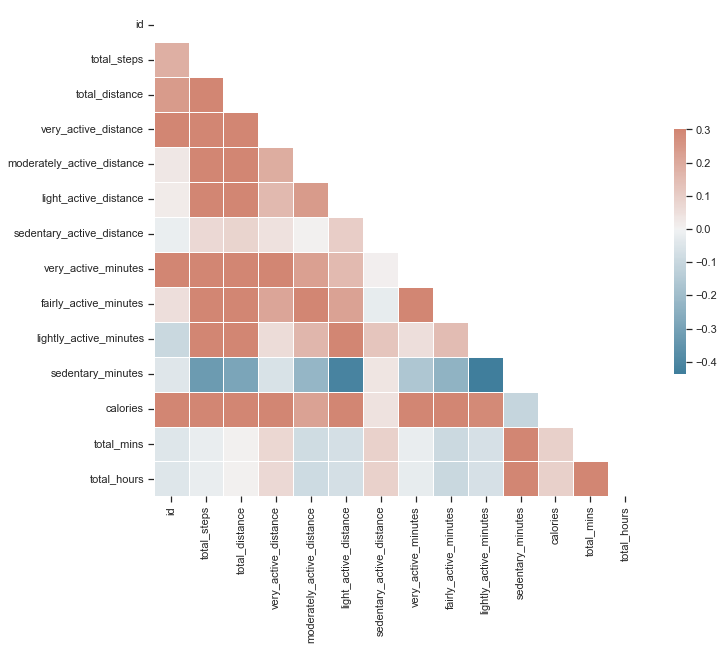

In [349]:
print(activity.corr(method='pearson'))
corr=activity.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f, ax=plt.subplots(figsize =(11,9))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,cmap=cmap, square=True, mask=mask, vmax=.3, center=0,linewidths=.5,cbar_kws={'shrink':.5})


Observation
- Calories & total distance- Calories and total distance are positively correlated which meand that the more distance a user is able to travel, the more calories burned. 
- Calories & very active minutes- Calories and active minutes are positvely correlated too. The more acive minutes, the more calories burned.
- Calories & sedentary_active_minutes- Calories and sedentary active minutes appear to be negatively correlated. 

#### Question: What's the percentage of Sedentary users?

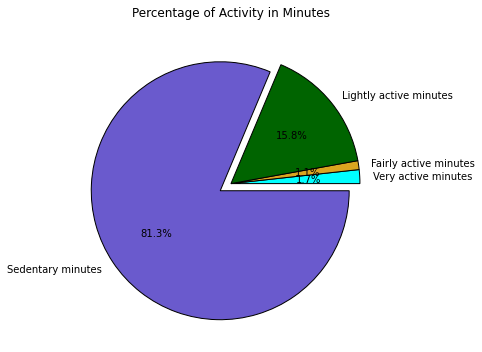

In [350]:
very_active_minutes= activity['very_active_minutes'].sum()
fairly_active_minutes= activity['fairly_active_minutes'].sum()
lightly_active_minutes= activity['lightly_active_minutes'].sum()
sedentary_minutes= activity['sedentary_minutes'].sum()
# plotting the chart
slices = [very_active_minutes, fairly_active_minutes, lightly_active_minutes, sedentary_minutes]
labels=['Very active minutes', 'Fairly active minutes', 'Lightly active minutes','Sedentary minutes']
colours=['cyan', 'goldenrod', 'darkgreen', 'slateblue']
explode = [0,0,0,0.1]
plt.figure(figsize=(15,5))
plt.style.use('default')
plt.pie(slices, labels=labels, colors=colours, wedgeprops={'edgecolor':'black'}, explode = explode, autopct="%1.1f%%")
plt.title('Percentage of Activity in Minutes')
plt.tight_layout()
plt.show()

Observation- Sedentary activity accounts for  81% of the total activity in minutes which is a huge chunk of data. 

#### Question: Do users mostly log active or sedentary minutes?

,index,sedentary_minutes,lightly_active_minutes,very_active_minutes,fairly_active_minutes
0,mean,991.210638,192.812766,21.164894,13.564894


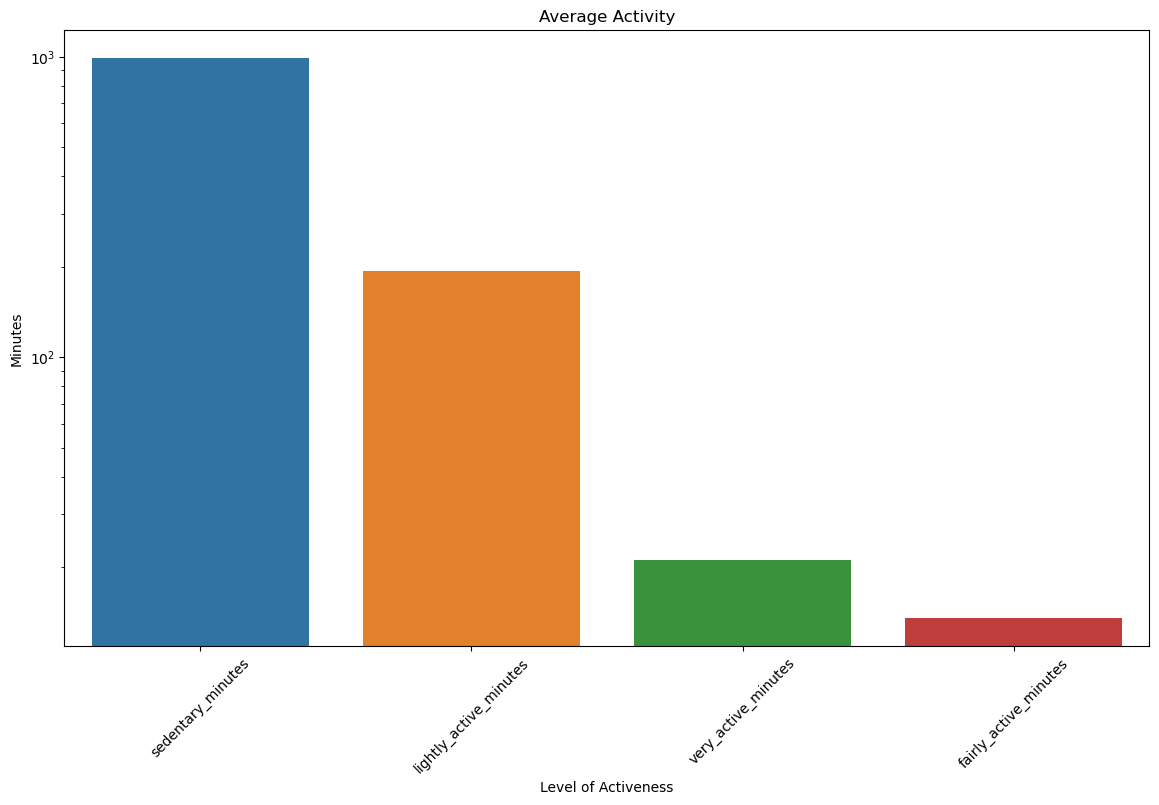

In [352]:
activity_mean=activity.agg(
    {'sedentary_minutes': ['mean'],'lightly_active_minutes': ['mean'], 'very_active_minutes': ['mean'], 'fairly_active_minutes': ['mean'] }).reset_index()
plt.figure(figsize=(14,8))
plt1 = sns.barplot(data= activity_mean, log=True)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt1.set(xlabel='Level of Activeness', ylabel='Minutes',title='Average Activity')
activity_mean

Observation- Most of the minutes logged are sedentary minutes, followed by lightly active minutes. 

#### Question: Do users mostly log active or light distances?

In [353]:
print(activity.columns)

Index(['id', 'date', 'total_steps', 'total_distance', 'very_active_distance',
       'moderately_active_distance', 'light_active_distance',
       'sedentary_active_distance', 'very_active_minutes',
       'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes',
       'calories', 'day_of_the_week', 'total_mins', 'total_hours'],
      dtype='object')


,index,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance
0,mean,1.502681,0.567543,3.340819,0.001606


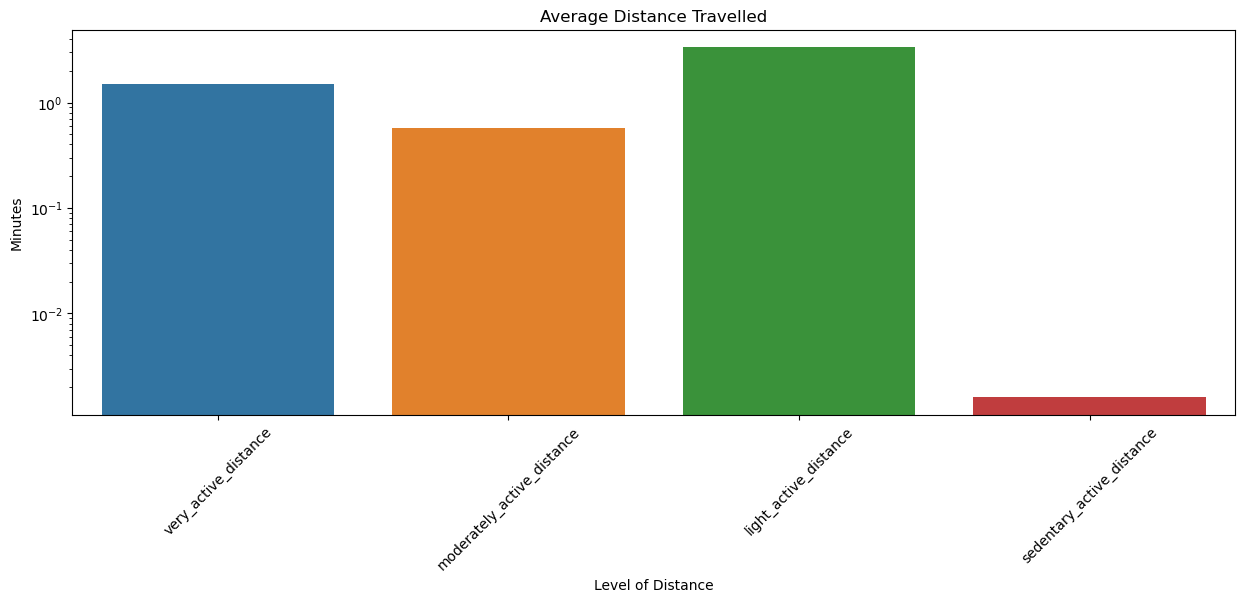

In [354]:
distance_mean=activity.agg(
    {'very_active_distance': ['mean'], 'moderately_active_distance': ['mean'], 'light_active_distance': ['mean'], 'sedentary_active_distance': ['mean']}).reset_index()
plt.figure(figsize=(15,5))
plt1 = sns.barplot(data= distance_mean, log=True)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt1.set(xlabel='Level of Distance', ylabel='Minutes',title='Average Distance Travelled')
distance_mean

Observation- Most of the distance tracked by the device is light. This shows that most of our users spend more time commuting short distances or running errands. 

#### Question: Is there any major change in activity levels and durations during the week? 

In [355]:
#to do this, we need to melt the activity levels according to the ordered day_of_the_week column
ActivityTypebyDay= activity.groupby(['day_of_the_week']).agg({
    'sedentary_minutes':'mean', 'lightly_active_minutes':'mean', 'fairly_active_minutes':'mean', 'very_active_minutes':'mean'}).reset_index()
mapping=pd.DataFrame({
    'Day':['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
})
sort_mapping= mapping.reset_index().set_index('Day')
ActivityTypebyDay['day_num'] = ActivityTypebyDay['day_of_the_week'].map(sort_mapping['index'])
ActivityTypebyDay.sort_values(['day_num'], inplace=True)
ActivityTypebyDay.drop('day_num', inplace=True, axis=1)


ActivityTypebyDay

,day_of_the_week,sedentary_minutes,lightly_active_minutes,fairly_active_minutes,very_active_minutes
1,Monday,1027.941667,192.058333,14.000000,23.108333
5,Tuesday,1007.361842,197.342105,14.335526,22.953947
6,Wednesday,989.480000,189.853333,13.100000,20.780000
4,Thursday,961.993197,185.421769,11.959184,19.408163
0,Friday,1000.309524,204.198413,12.111111,20.055556
2,Saturday,964.282258,207.145161,15.201613,21.919355
3,Sunday,990.256198,173.975207,14.528926,19.983471


In [356]:
melted_ActivityTypebyDay = ActivityTypebyDay.melt('day_of_the_week', var_name='activity_level', value_name='minutes')

print(melted_ActivityTypebyDay)


   day_of_the_week          activity_level      minutes
0           Monday       sedentary_minutes  1027.941667
1          Tuesday       sedentary_minutes  1007.361842
2        Wednesday       sedentary_minutes   989.480000
3         Thursday       sedentary_minutes   961.993197
4           Friday       sedentary_minutes  1000.309524
5         Saturday       sedentary_minutes   964.282258
6           Sunday       sedentary_minutes   990.256198
7           Monday  lightly_active_minutes   192.058333
8          Tuesday  lightly_active_minutes   197.342105
9        Wednesday  lightly_active_minutes   189.853333
10        Thursday  lightly_active_minutes   185.421769
11          Friday  lightly_active_minutes   204.198413
12        Saturday  lightly_active_minutes   207.145161
13          Sunday  lightly_active_minutes   173.975207
14          Monday   fairly_active_minutes    14.000000
15         Tuesday   fairly_active_minutes    14.335526
16       Wednesday   fairly_active_minutes    13

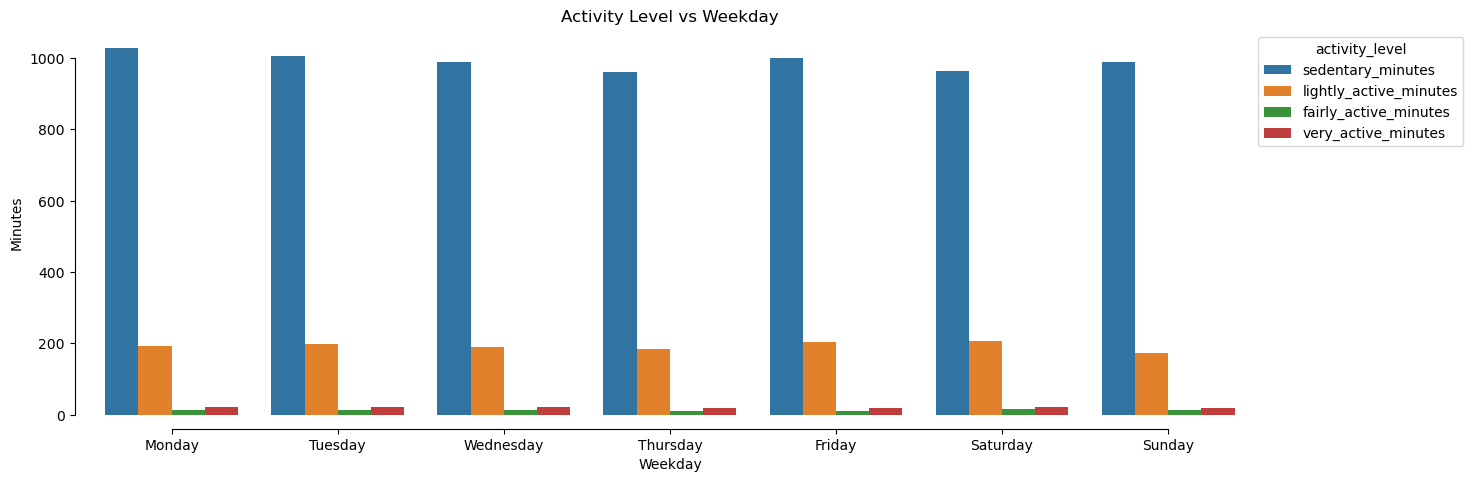

In [357]:

f, ax = plt.subplots(figsize=(15,5))
ax= sns.barplot(data=melted_ActivityTypebyDay, x='day_of_the_week', y='minutes', hue='activity_level')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='Weekday', ylabel='Minutes', title='Activity Level vs Weekday')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
sns.despine(offset=10, trim=True);


Observation- There is a consistency seen in the activity levels and their durations. 

#### Question: Is there any change in distance types and distance during the week? 

In [358]:
DistanceTravelledTypebyDay= activity.groupby(['day_of_the_week']).agg({
    'light_active_distance':'mean', 'moderately_active_distance':'mean', 'very_active_distance':'mean'}).reset_index()

DistanceTravelledTypebyDay['day_num'] = ActivityTypebyDay['day_of_the_week'].map(sort_mapping['index'])
DistanceTravelledTypebyDay.sort_values(['day_num'], inplace=True)
DistanceTravelledTypebyDay.drop('day_num', inplace=True, axis=1)


DistanceTravelledTypebyDay

,day_of_the_week,light_active_distance,moderately_active_distance,very_active_distance
1,Monday,3.363083,0.585833,1.537333
5,Tuesday,3.471053,0.593026,1.613289
6,Wednesday,3.256333,0.527067,1.633467
4,Thursday,3.283129,0.505170,1.390476
0,Friday,3.489127,0.483810,1.312937
2,Saturday,3.617177,0.677339,1.514597
3,Sunday,2.892314,0.618017,1.488926


In [359]:
melted_DistanceTravelledTypebyDay = DistanceTravelledTypebyDay.melt('day_of_the_week', var_name='distance_type', value_name='distance')

print(melted_DistanceTravelledTypebyDay)


   day_of_the_week               distance_type  distance
0           Monday       light_active_distance  3.363083
1          Tuesday       light_active_distance  3.471053
2        Wednesday       light_active_distance  3.256333
3         Thursday       light_active_distance  3.283129
4           Friday       light_active_distance  3.489127
5         Saturday       light_active_distance  3.617177
6           Sunday       light_active_distance  2.892314
7           Monday  moderately_active_distance  0.585833
8          Tuesday  moderately_active_distance  0.593026
9        Wednesday  moderately_active_distance  0.527067
10        Thursday  moderately_active_distance  0.505170
11          Friday  moderately_active_distance  0.483810
12        Saturday  moderately_active_distance  0.677339
13          Sunday  moderately_active_distance  0.618017
14          Monday        very_active_distance  1.537333
15         Tuesday        very_active_distance  1.613289
16       Wednesday        very_

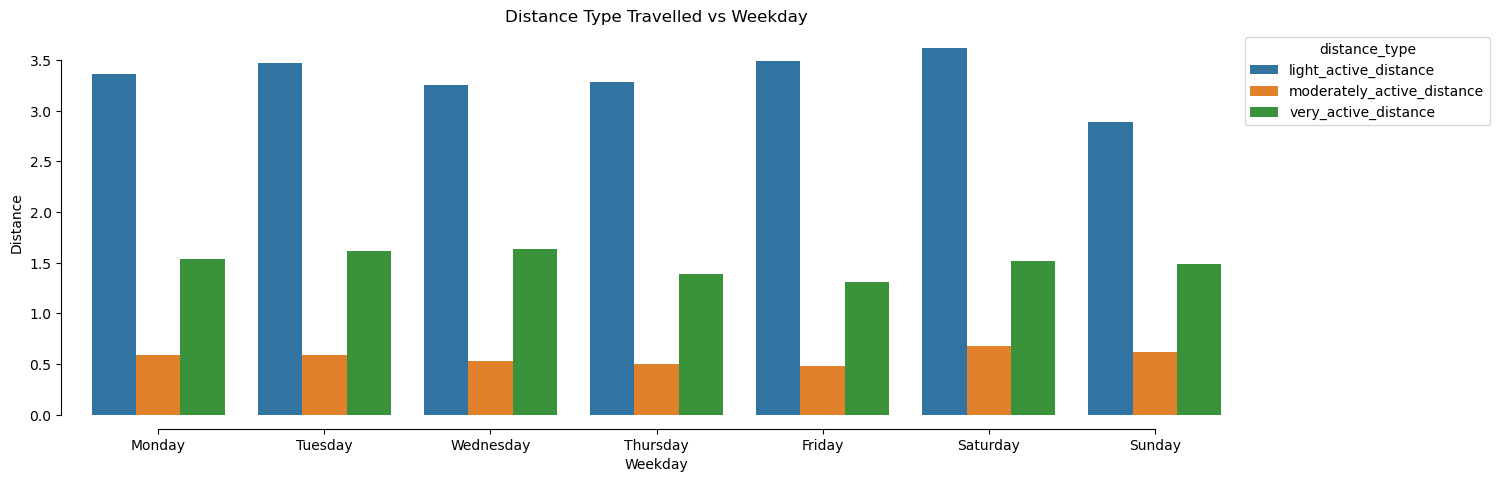

In [360]:
f, ax = plt.subplots(figsize=(15,5))
ax= sns.barplot(data=melted_DistanceTravelledTypebyDay, x='day_of_the_week', y='distance', hue='distance_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='Weekday', ylabel='Distance', title='Distance Type Travelled vs Weekday')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
sns.despine(offset=10, trim=True);


Observation- There is a consistency seen in the distance types and their values. 

### Conclusions

- Most of the the users are sedentary users(81%). Obviously, they do not make use of the smart device to meet fitness goals. 
- Most of our users do not travel long distance. They probably only commute to/from work. 
- Users do not take enough daily steps to be considered 'fit.'
- Users probably do not understand how features like sleep and calories can affect their health. 


### Recommendations

- Help the users understand what it means to be fit. Connect them to the benefits of fitness then explain how their activities with our devices can help them reach there. 
- Help them understand how to use the app properly. 
- Create challenges that increase activity during weekends. 
- Send reminders whenever the app has been idle. 
- Organize groups of women and create activities that connect them to the vision of the brand. 



In [361]:
# save the data
activity.to_pickle('cleaned_activity.pkl')
sleep.to_pickle('cleaned_sleep.pkl')